<a href="https://colab.research.google.com/github/nzl-thu/PRMLTA/blob/main/cifar10_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# For tips on running notebooks in Google Colab, see
# https://pytorch.org/tutorials/beginner/colab
%matplotlib inline
from matplotlib import pyplot as plt


# Tensors

Tensors are a specialized data structure that are very similar to arrays
and matrices. In PyTorch, we use tensors to encode the inputs and
outputs of a model, as well as the model’s parameters.

Tensors are similar to NumPy’s ndarrays, except that tensors can run on
GPUs or other specialized hardware to accelerate computing. If you’re familiar with ndarrays, you’ll
be right at home with the Tensor API. If not, follow along in this quick
API walkthrough.


In [2]:
import torch
import numpy as np

## Tensor Initialization

Tensors can be initialized in various ways. Take a look at the following examples:

**Directly from data**

Tensors can be created directly from data. The data type is automatically inferred.



In [3]:
data = [[1, 2], [3, 4]]
x_data = torch.tensor(data)

**From a NumPy array**

Tensors can be created from NumPy arrays (and vice versa - see `bridge-to-np-label`).



In [ ]:
np_array = np.array(data)
x_np = torch.from_numpy(np_array)

**From another tensor:**

The new tensor retains the properties (shape, datatype) of the argument tensor, unless explicitly overridden.



In [ ]:
x_ones = torch.ones_like(x_data) # retains the properties of x_data
print(f"Ones Tensor: \n {x_ones} \n")

x_rand = torch.rand_like(x_data, dtype=torch.float) # overrides the datatype of x_data
print(f"Random Tensor: \n {x_rand} \n")

**With random or constant values:**

``shape`` is a tuple of tensor dimensions. In the functions below, it determines the dimensionality of the output tensor.



In [ ]:
shape = (2, 3,)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor}")

--------------




## Tensor Attributes

Tensor attributes describe their shape, datatype, and the device on which they are stored.



In [ ]:
tensor = torch.rand(3, 4)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

--------------




## Tensor Operations

Over 100 tensor operations, including transposing, indexing, slicing,
mathematical operations, linear algebra, random sampling, and more are
comprehensively described
[here](https://pytorch.org/docs/stable/torch.html)_.

Each of them can be run on the GPU (at typically higher speeds than on a
CPU). If you’re using Colab, allocate a GPU by going to Edit > Notebook
Settings.




In [ ]:
# We move our tensor to the GPU if available
if torch.cuda.is_available():
  tensor = tensor.to('cuda')
  print(f"Device tensor is stored on: {tensor.device}")

Try out some of the operations from the list.
If you're familiar with the NumPy API, you'll find the Tensor API a breeze to use.




**Standard numpy-like indexing and slicing:**



In [ ]:
tensor = torch.ones(4, 4)
tensor[:,1] = 0
print(tensor)

**Joining tensors** You can use ``torch.cat`` to concatenate a sequence of tensors along a given dimension.
See also [torch.stack](https://pytorch.org/docs/stable/generated/torch.stack.html)_,
another tensor joining op that is subtly different from ``torch.cat``.



In [ ]:
t1 = torch.cat([tensor, tensor, tensor], dim=1)
print(t1)

**Multiplying tensors**



In [ ]:
# This computes the element-wise product
print(f"tensor.mul(tensor) \n {tensor.mul(tensor)} \n")
# Alternative syntax:
print(f"tensor * tensor \n {tensor * tensor}")

This computes the matrix multiplication between two tensors



In [ ]:
print(f"tensor.matmul(tensor.T) \n {tensor.matmul(tensor.T)} \n")
# Alternative syntax:
print(f"tensor @ tensor.T \n {tensor @ tensor.T}")

**In-place operations**
Operations that have a ``_`` suffix are in-place. For example: ``x.copy_(y)``, ``x.t_()``, will change ``x``.



In [ ]:
print(tensor, "\n")
tensor.add_(5)
print(tensor)

<div class="alert alert-info"><h4>Note</h4><p>In-place operations save some memory, but can be problematic when computing derivatives because of an immediate loss
     of history. Hence, their use is discouraged.</p></div>



# A toy example

In lecture 9, we have presented a simple demo with numpy for classification. Now we show how this can be achieved by pytorch.

First, let's prepare our toy dataset:

In [4]:
import torch
from matplotlib import pyplot as plt

# Set random seed for reproducibility
torch.manual_seed(42)

# Initialize weights and data
N, Din, H, Dout = 128, 64, 64, 1
lr = 5e-5

# Training data
x_train = torch.randn(N, Din)
y_train = torch.zeros(N, 1)
x_train[:N // 2, 0] = x_train[:N // 2, 0] * 2 + 3
y_train[:N // 2, 0] = 1

# Test data
N_test = N
x_test = torch.randn(N_test, Din)
y_test = torch.zeros(N_test, 1)
x_test[:N_test // 2, 0] = x_test[:N_test // 2, 0] * 2 + 3
y_test[:N_test // 2, 0] = 1

Now let's visualize our training data:

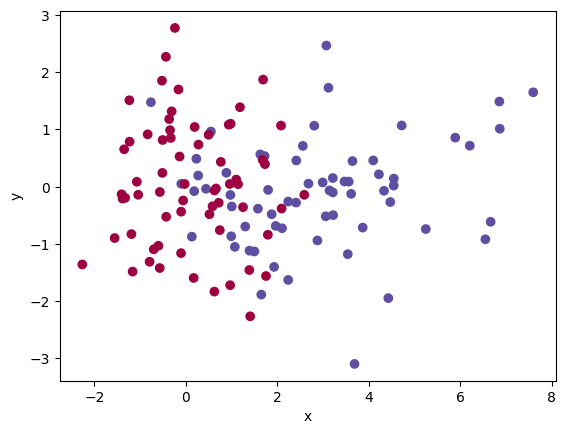

In [5]:
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train[:, 0], cmap=plt.cm.Spectral)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Now, we define our neural network with one hidden layer (with the dimension being `H`). The neural network is parameterized by two matrices: `theta1` (project input data into hidden space) and `theta2` (project from hidden space to output space):

In [30]:
theta1 = torch.randn(Din, H, requires_grad=True)
theta2 = torch.randn(H, Dout, requires_grad=True)

## Forward Propagation and Loss Calculation
We can easily use forward propagation to obtain the model's prediction and calculate the cross-entropy loss within few lines:

In [31]:
h = torch.sigmoid(x_train.matmul(theta1))
h.retain_grad()
y_pred = torch.sigmoid(h.matmul(theta2))

# Calculate loss
loss = torch.mean(-(1 - y_train) * torch.log(1 - y_pred) - y_train * torch.log(y_pred))

## Back Propagation
For gradient calculation, pytorch can automatically achieve this by a single call of `loss.backward()`:

In [32]:
loss.backward()

# obtain the gradients on theta1 and theta2
print('dJ / d theta1=\n', theta1.grad, "\nshape of dJ / d theta1:", theta1.grad.shape)
print('dJ / d theta2=\n', theta2.grad, "\nshape of dJ / d theta2:", theta2.grad.shape)

dJ / d theta1=
 tensor([[ 4.0938e-02, -4.3043e-02,  6.0427e-03,  ...,  2.3516e-02,
          1.8382e-02,  8.3365e-04],
        [ 3.5143e-03,  1.1285e-02, -7.6663e-04,  ..., -3.0519e-04,
          2.8649e-03,  1.0548e-04],
        [ 9.5268e-03, -7.1627e-03, -4.7395e-05,  ...,  4.8871e-03,
          4.8233e-03, -1.0233e-06],
        ...,
        [ 1.1853e-02, -5.0302e-03,  1.5210e-03,  ..., -4.4171e-04,
          9.2421e-03,  1.1308e-04],
        [-9.7145e-03, -1.3430e-03, -2.4203e-04,  ...,  1.6269e-03,
         -1.7932e-03, -7.1145e-05],
        [-4.7076e-03, -9.0591e-03,  1.8036e-03,  ..., -3.0826e-03,
         -3.4869e-03, -1.2574e-04]]) 
shape of dJ / d theta1: torch.Size([64, 64])
dJ / d theta2=
 tensor([[ 0.0308],
        [ 0.0630],
        [-0.1268],
        [-0.0028],
        [-0.0661],
        [-0.0514],
        [ 0.0410],
        [ 0.0519],
        [ 0.0070],
        [ 0.0587],
        [-0.0673],
        [-0.0955],
        [-0.0299],
        [ 0.0044],
        [ 0.0490],
     

We can also inspect the gradient $dJ/dh$, that is the gradient with respect to the activation of the hidden layer:

In [10]:
print("dJ/dh=\n", h.grad)
print("shape of dJ/dh:", h.grad.shape)

dJ/dh=
 tensor([[ 1.5533e-04,  1.9420e-04,  8.8764e-04,  ...,  4.0766e-04,
          9.7185e-04, -3.1651e-04],
        [ 5.6695e-06,  7.0882e-06,  3.2399e-05,  ...,  1.4880e-05,
          3.5472e-05, -1.1552e-05],
        [ 2.3219e-05,  2.9030e-05,  1.3269e-04,  ...,  6.0939e-05,
          1.4528e-04, -4.7313e-05],
        ...,
        [-2.2218e-03, -2.7777e-03, -1.2696e-02,  ..., -5.8310e-03,
         -1.3901e-02,  4.5272e-03],
        [-1.7793e-03, -2.2246e-03, -1.0168e-02,  ..., -4.6698e-03,
         -1.1133e-02,  3.6257e-03],
        [-1.2929e-03, -1.6164e-03, -7.3884e-03,  ..., -3.3932e-03,
         -8.0894e-03,  2.6345e-03]])
shape of dJ/dh: torch.Size([128, 64])


## Gradient Descent
Next, we can use pytorch's optimizer to perform gradient descent easily:

In [33]:
import torch.optim as optim
optimizer = optim.SGD([theta1, theta2], lr=0.01)

theta1_orig = theta1.clone().detach()  # record the parameters before gradient descent, we use theta_1 as an example
optimizer.step()  # perform gradient descent
print('theta_1 before gradient descent:\n', theta1_orig)
print('theta_1 after gradient descent:\n', theta1)

theta_1 before gradient descent:
 tensor([[-0.8476, -0.0746,  1.6060,  ...,  0.0655,  1.2327,  1.5566],
        [-1.2382, -1.3372,  0.1522,  ..., -1.5389, -0.5543,  0.4781],
        [-0.8741, -0.9685,  0.3821,  ..., -0.1423, -0.3998, -1.1256],
        ...,
        [-0.9507, -0.6412,  0.6762,  ...,  1.6346,  1.7163,  0.5287],
        [ 0.3617,  0.0284,  0.7862,  ..., -0.4626,  0.0907,  0.4144],
        [-0.3127,  1.0867,  1.2147,  ...,  0.4430,  1.6820,  1.9812]])
theta_1 after gradient descent:
 tensor([[-0.8480, -0.0741,  1.6059,  ...,  0.0653,  1.2325,  1.5566],
        [-1.2382, -1.3373,  0.1523,  ..., -1.5389, -0.5543,  0.4781],
        [-0.8742, -0.9684,  0.3821,  ..., -0.1424, -0.3999, -1.1256],
        ...,
        [-0.9508, -0.6412,  0.6761,  ...,  1.6346,  1.7162,  0.5287],
        [ 0.3618,  0.0284,  0.7862,  ..., -0.4626,  0.0907,  0.4144],
        [-0.3126,  1.0868,  1.2147,  ...,  0.4430,  1.6821,  1.9812]],
       requires_grad=True)


The parameters have already been updated by `optimizer.step`.
We can verify this gradient descent step is equal as our learned formulation:

$$
\theta_1\leftarrow \theta_1 - \alpha \cdot \frac{\partial J}{\partial \theta_1}
$$

In [34]:
theta1_new_analytical = theta1_orig - 0.01 * theta1.grad
print('theta_1 after gradient descent (analytical):\n', theta1_new_analytical)
print('theta_1 after gradient descent (analytical) - theta_1 after gradient descent (PyTorch):\n', theta1_new_analytical - theta1)

theta_1 after gradient descent (analytical):
 tensor([[-0.8480, -0.0741,  1.6059,  ...,  0.0653,  1.2325,  1.5566],
        [-1.2382, -1.3373,  0.1523,  ..., -1.5389, -0.5543,  0.4781],
        [-0.8742, -0.9684,  0.3821,  ..., -0.1424, -0.3999, -1.1256],
        ...,
        [-0.9508, -0.6412,  0.6761,  ...,  1.6346,  1.7162,  0.5287],
        [ 0.3618,  0.0284,  0.7862,  ..., -0.4626,  0.0907,  0.4144],
        [-0.3126,  1.0868,  1.2147,  ...,  0.4430,  1.6821,  1.9812]])
theta_1 after gradient descent (analytical) - theta_1 after gradient descent (PyTorch):
 tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]], grad_fn=<SubBackward0>)


## Training Loop
Now, let's perform training on this toy dataset by repeating the above forward & backward & gradient descent pipeline for 10000 times and see how the neural network learns. 

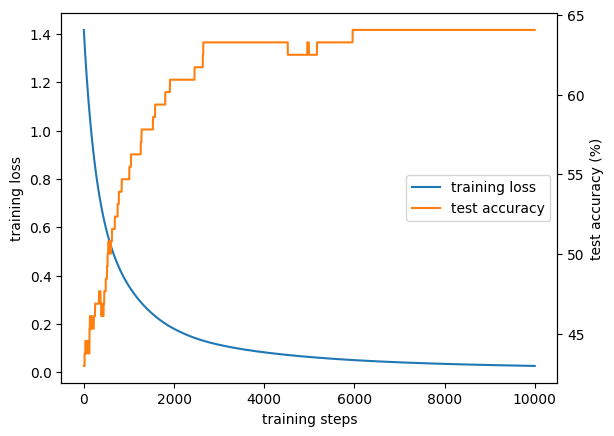

In [35]:
# Training
loss_list = []
accuracy_list = []
for t in range(10000):
    optimizer.zero_grad()
    # Forward
    h = torch.sigmoid(x_train.matmul(theta1))
    y_pred = torch.sigmoid(h.matmul(theta2))
    
    # Calculate loss
    loss = torch.mean(-(1 - y_train) * torch.log(1 - y_pred) - y_train * torch.log(y_pred))
    loss_list.append(loss.item())

    # Test accuracy
    with torch.no_grad():
        h_test = torch.sigmoid(x_test.matmul(theta1))
        y_pred_test = torch.sigmoid(h_test.matmul(theta2))
        accuracy = torch.mean(((y_pred_test > 0.5) == y_test).float()).item() * 100.0
        accuracy_list.append(accuracy)
    
    # Backward
    loss.backward()
    
    # Update weights with gradient descent
    optimizer.step()
    
# Plot
fig, ax1 = plt.subplots()
ax1.set_xlabel("training steps")
ax1.set_ylabel("training loss")
loss_curve = ax1.plot(range(len(loss_list)), loss_list, label="training loss", color="tab:blue")

ax2 = ax1.twinx()
ax2.set_ylabel("test accuracy (%)")
accuracy_curve = ax2.plot(range(len(accuracy_list)), accuracy_list, label="test accuracy", color="tab:orange")

curves = loss_curve + accuracy_curve
labels = [c.get_label() for c in curves]
ax1.legend(curves, labels, loc="center right")

plt.show()



# Training a Classifier


## Data Preparation

Generally, when you have to deal with image, text, audio or video data,
you can use standard python packages that load data into a numpy array.
Then you can convert this array into a ``torch.*Tensor``.

Specifically for vision, we have created a package called
``torchvision``, that has data loaders for common datasets such as
ImageNet, CIFAR10, MNIST, etc. and data transformers for images, viz.,
``torchvision.datasets`` and ``torch.utils.data.DataLoader``.

This provides a huge convenience and avoids writing boilerplate code.

For this tutorial, we will use the CIFAR10 dataset.
It has the classes: ‘airplane’, ‘automobile’, ‘bird’, ‘cat’, ‘deer’,
‘dog’, ‘frog’, ‘horse’, ‘ship’, ‘truck’. The images in CIFAR-10 are of
size 3x32x32, i.e. 3-channel color images of 32x32 pixels in size.

## Training an image classifier

We will do the following steps in order:

1. Load and normalize the CIFAR10 training and test datasets using
   ``torchvision``
2. Define a Neural Network
3. Define a loss function
4. Train the network on the training data
5. Test the network on the test data

### 1. Load and normalize CIFAR10

Using ``torchvision``, it’s extremely easy to load CIFAR10.


In [ ]:
import torchvision
import torchvision.transforms as transforms

The output of torchvision datasets are PILImage images of range [0, 1].
We transform them to Tensors of normalized range [-1, 1].



In [ ]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 128

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=4)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=4)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

100%|██████████| 170498071/170498071 [00:06<00:00, 28383578.52it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data


/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Files already downloaded and verified


Let us show some of the training images, for fun.



/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


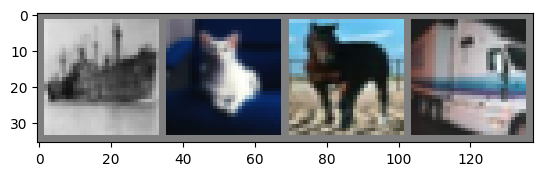

ship  cat   horse truck


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images[:4]))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

### 2. Define a Neural Network
Here, we define a simple neural network with 2 hidden layers:



In [ ]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(3*32*32, 768)
        self.fc2 = nn.Linear(768, 10)
        
    def forward(self, x):
        x = x.flatten(1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        return x

net = Net().cuda()  # put the neural network to GPU

### 3. Define a Loss function and optimizer
Let's use a Classification Cross-Entropy loss.
For optimizer, we adopt a highly effective one called Adam. 

Tips: If you are not sure which optimizer to use, try Adam first!

In [ ]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

### 4. Train the network

This is when things start to get interesting.
We simply have to loop over our data iterator, and feed the inputs to the
network and optimize.



In [ ]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):

        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data[0].cuda(), data[1].cuda()  # Note that we should also put data and label to GPU to accelerate training

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 20 == 19:    # print every 20 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 20:.3f}')
            running_loss = 0.0

[1,    20] loss: 2.037
[1,    40] loss: 1.822
[1,    60] loss: 1.740
[1,    80] loss: 1.777
[1,   100] loss: 1.682
[1,   120] loss: 1.720
[1,   140] loss: 1.618
[1,   160] loss: 1.586
[1,   180] loss: 1.649
[1,   200] loss: 1.660
[1,   220] loss: 1.610
[1,   240] loss: 1.597
[1,   260] loss: 1.525
[1,   280] loss: 1.569
[1,   300] loss: 1.602
[1,   320] loss: 1.543
[1,   340] loss: 1.580
[1,   360] loss: 1.502
[1,   380] loss: 1.554
[2,    20] loss: 1.441
[2,    40] loss: 1.451
[2,    60] loss: 1.473
[2,    80] loss: 1.457
[2,   100] loss: 1.486
[2,   120] loss: 1.500
[2,   140] loss: 1.477
[2,   160] loss: 1.495
[2,   180] loss: 1.435
[2,   200] loss: 1.448
[2,   220] loss: 1.434
[2,   240] loss: 1.459
[2,   260] loss: 1.439
[2,   280] loss: 1.439
[2,   300] loss: 1.432
[2,   320] loss: 1.430
[2,   340] loss: 1.434
[2,   360] loss: 1.442
[2,   380] loss: 1.464


Let's quickly save our trained model:



In [ ]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

See [here](https://pytorch.org/docs/stable/notes/serialization.html)
for more details on saving PyTorch models.

### 5. Test the network on the test data

We have trained the network for 2 passes over the training dataset.
But we need to check if the network has learnt anything at all.

We will check this by predicting the class label that the neural network
outputs, and checking it against the ground-truth. If the prediction is
correct, we add the sample to the list of correct predictions.

Okay, first step. Let us display images from the test set to get familiar.



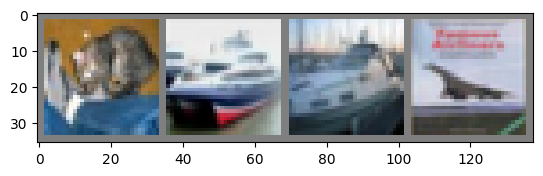

GroundTruth:  cat   ship  ship  plane


In [ ]:
dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images[:4]))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

Next, let's load back in our saved model (note: saving and re-loading the model
wasn't necessary here, we only did it to illustrate how to do so):



In [ ]:
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

Okay, now let us see what the neural network thinks these examples above are:



In [ ]:
outputs = net(images)
print("outputs.shape:", outputs.shape)
print("outputs:\n", outputs)

outputs.shape: torch.Size([128, 10])
outputs:
 tensor([[ 0.0821,  0.8933,  1.1616,  ..., -4.5891,  1.7375, -2.1642],
        [ 2.0355,  4.5919, -1.4821,  ..., -3.9441,  3.5322,  5.3908],
        [ 4.2417,  4.0741, -1.5205,  ..., -1.9349,  4.4799,  3.7503],
        ...,
        [ 0.0176,  1.2519,  0.2961,  ..., -0.1408, -1.7792,  0.1353],
        [ 0.9415, -0.0453, -0.1328,  ..., -0.3279,  1.3832,  1.4473],
        [-2.0166, -0.8862,  0.6704,  ...,  1.5208, -0.9208,  1.0073]],
       grad_fn=<AddmmBackward0>)


The outputs are energies for the 10 classes.
The higher the energy for a class, the more the network
thinks that the image is of the particular class.
So, let's get the index of the highest energy:



In [ ]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))

Predicted:  cat   truck ship  plane


The results seem ok.

Let us look at how the network performs on the whole dataset.



In [ ]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data[0], data[1]
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 48 %


That looks **way better than chance**, which is 10% accuracy (randomly picking
a class out of 10 classes).
That means the network have already learnt something with this small period of training.

Hmmm, what are the classes that performed well, and the classes that did
not perform well:



In [ ]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: plane is 56.8 %
Accuracy for class: car   is 49.0 %
Accuracy for class: bird  is 20.8 %
Accuracy for class: cat   is 20.6 %
Accuracy for class: deer  is 36.5 %
Accuracy for class: dog   is 44.5 %
Accuracy for class: frog  is 64.2 %
Accuracy for class: horse is 66.1 %
Accuracy for class: ship  is 59.9 %
Accuracy for class: truck is 68.7 %


Okay, so what next?

## Exercise: Build a more powerful neural network

The previous example is a basic proof of concept of how we can use pytorch to build neural networks. Now it's your turn to build a more powerful neural network!

### ResNet
ResNet is a deep convolutional neural network, uses residual connections to address vanishing gradients and performance degradation in deep networks.

Simply put, the core idea of ResNet is a so called "skip" connection:

\begin{align}\text{without skip}&: y=f(x) \\ \text{with skip}&: y=f(x)+x\end{align}

A ResNet is typically consists of 3 parts: 
1. The first part uses one convolutional layer to project the input images into a feature space.
2. The second part consists of multiple blocks for feature processing.
3. The third part performs a spatial pooling and converts the feature into classification results.
The building block of the second part is the key of ResNet, which is achieved by BasicBlock class.

### Your task: 
Finish the BasicBlock class and perform training & evaluation using your ResNet. Compare how it performs with the previous vannila neural network.

In [ ]:
class BasicBlock(nn.Module):
    def __init__(self, dim):
        super().__init__()
        # TODO
        self.conv1 = nn.Conv2d(dim, dim, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(dim)
        self.conv2 = nn.Conv2d(dim, dim, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(dim)

    def forward(self, x):
        # TODO
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.bn2(self.conv2(out))
        out += x
        out = F.relu(out)
        return out

In [ ]:
class ResNet(nn.Module):
    def __init__(self, n_blocks, num_classes=10):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.blocks = nn.Sequential(*[
            BasicBlock(dim=32) for _ in range(n_blocks)
        ])
        self.linear = nn.Linear(32, num_classes)

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.blocks(out)
        out = F.avg_pool2d(out, 32)
        out = out.view(out.size(0), -1)
        out = self.linear(out)
        return out

net = ResNet(n_blocks=6).cuda()


Then, it's time to train & test the performance of your neural network! 

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):

        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data[0].cuda(), data[1].cuda()

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 20 == 19:    # print every 20 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 20:.3f}')
            running_loss = 0.0

correct = 0
total = 0
net.eval()
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].cuda(), data[1].cuda()
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

[1,    20] loss: 2.010
[1,    40] loss: 1.757
[1,    60] loss: 1.644
[1,    80] loss: 1.619
[1,   100] loss: 1.545
[1,   120] loss: 1.542
[1,   140] loss: 1.501
[1,   160] loss: 1.476
[1,   180] loss: 1.440
[1,   200] loss: 1.410
[1,   220] loss: 1.361
[1,   240] loss: 1.356
[1,   260] loss: 1.338
[1,   280] loss: 1.332
[1,   300] loss: 1.283
[1,   320] loss: 1.245
[1,   340] loss: 1.267
[1,   360] loss: 1.230
[1,   380] loss: 1.190
[2,    20] loss: 1.153
[2,    40] loss: 1.162
[2,    60] loss: 1.186
[2,    80] loss: 1.138
[2,   100] loss: 1.111
[2,   120] loss: 1.131
[2,   140] loss: 1.126
[2,   160] loss: 1.126
[2,   180] loss: 1.073
[2,   200] loss: 1.071
[2,   220] loss: 1.035
[2,   240] loss: 1.046
[2,   260] loss: 1.049
[2,   280] loss: 1.059
[2,   300] loss: 1.010
[2,   320] loss: 1.018
[2,   340] loss: 0.977
[2,   360] loss: 1.005
[2,   380] loss: 0.957
Accuracy of the network on the 10000 test images: 60 %


### Your task 2: 
Load CIFAR100 dataset in torchvision by yourself, then perform train & eval on CIFAR100 dataset.

**Note:**The network and optimizer should be re-initialized before training on CIFAR100. 



# A Gentle Introduction to ``torch.autograd``

``torch.autograd`` is PyTorch’s automatic differentiation engine that powers
neural network training. In this section, you will get a basic sense of how ``autograd`` collects gradients.


In homework 8, you have encountered some matrix calculus equations. For example:

\begin{align}&\frac{\partial}{\partial{X}}\mathrm{\text{Tr}}((Y-CX)^T(Y-CX))=-2 C^T (Y-CX)\end{align}

Now, let's see how we can perform this gradient calculation using pytorch's autograd mechanics (**without** the need of knowing the explicit formula of the gradient).




We first create the matrix ``X``, ``C`` and ``Y``. Note that we pass ``requires_grad=True`` when creating matrix ``X``. This signals to ``autograd`` that every operation on them should be tracked.

In [ ]:
import torch
X = torch.randn(4, 4, requires_grad=True)
C = torch.randn(4, 4)
Y = torch.randn(4, 4)

In [ ]:
print('expected gradient on X:\n', -2 * C.T @ (Y - C @ X))
# calculate the result
Q=torch.trace((Y-C @ X).T @ (Y-C.matmul(X)))
# perform back-propagation
Q.backward()
print('autograd calculated gradient on X:\n', X.grad)  # the gradients on X are stored in X.grad 

expected gradient on X:

autograd calculated gradient on X:
 tensor([[  7.1441,   5.9599, -12.2284,  -4.2436],
        [ -0.0804,   7.4010,  -2.1676,  -3.2257],
        [ -0.3697,  -0.9004,  -0.1805,  -0.8725],
        [ -3.0835,  -1.3337,   2.0578,   5.0140]])


Nice! The gradient calculated by autograd is the same as our analytical solution!

Now, let's re-execute the cell and see what happens!

In [ ]:
print('expected gradient on X:\n', -2 * C.T @ (Y - C @ X))
# calculate the result
Q=torch.trace((Y-C @ X).T @ (Y-C.matmul(X)))
# perform back-propagation
Q.backward()
print('autograd calculated gradient on X:\n', X.grad)

expected gradient on X:
 tensor([[  7.1441,   5.9599, -12.2284,  -4.2436],
        [ -0.0804,   7.4010,  -2.1676,  -3.2257],
        [ -0.3697,  -0.9004,  -0.1805,  -0.8725],
        [ -3.0835,  -1.3337,   2.0578,   5.0140]], grad_fn=<MmBackward0>)
autograd calculated gradient on X:
 tensor([[ 14.2882,  11.9197, -24.4569,  -8.4872],
        [ -0.1608,  14.8019,  -4.3352,  -6.4514],
        [ -0.7395,  -1.8008,  -0.3610,  -1.7449],
        [ -6.1670,  -2.6675,   4.1155,  10.0280]])


Why in this time the autograd calculated gradient is not the same as our analytical result? This is because every time ``backward()`` function is called, gradients calculated by autograd are **accumulated** into ``X.grad``. 

As a result, if we are only interested in the gradients for current operations, we must first clear previously stored gradients:

In [ ]:
print('expected gradient on X:\n', -2 * C.T @ (Y - C @ X))
Q=torch.trace((Y-C @ X).T @ (Y-C.matmul(X)))
X.grad.zero_()  # Important! Clear the previously stored gradients
Q.backward()
print('autograd calculated gradient on X:\n', X.grad)

expected gradient on X:
 tensor([[  7.1441,   5.9599, -12.2284,  -4.2436],
        [ -0.0804,   7.4010,  -2.1676,  -3.2257],
        [ -0.3697,  -0.9004,  -0.1805,  -0.8725],
        [ -3.0835,  -1.3337,   2.0578,   5.0140]], grad_fn=<MmBackward0>)
autograd calculated gradient on X:
 tensor([[  7.1441,   5.9599, -12.2284,  -4.2436],
        [ -0.0804,   7.4010,  -2.1676,  -3.2257],
        [ -0.3697,  -0.9004,  -0.1805,  -0.8725],
        [ -3.0835,  -1.3337,   2.0578,   5.0140]])


Works as we expected again!

Therefore, when performing neural network training, we will use ``zero_grad`` of optimizer to clear the gradient before performing gradient update.